# Importing and Installing Libraries 

2025-08-18 10:25:56.141544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755512756.421845      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755512756.502797      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


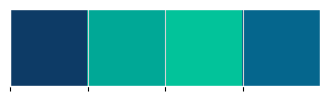

In [1]:
# Import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
from io import StringIO

# Modelling
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFECV
from sklearn.base import clone
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from lightgbm import plot_importance
import optuna
import statsmodels.api as sm
import shap

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from __future__ import annotations
import os
import math
import warnings
from dataclasses import dataclass
from typing import Tuple, Dict, List, Optional

# Warnings filtering.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
# mpl.rcParams['figure.dpi']          = 150

# # Palette Seting
ts_palette = ['#0D3B66', '#00A896', '#02C39A', '#05668D']   # deep blue, teal, aquamarine, dark cyan
kde_palette = ['#0D3B66', '#02C39A']                        # deep blue, aquamarine

sns.set_palette(sns.color_palette(ts_palette))
sns.palplot(sns.color_palette(ts_palette))

# Data understanding
- The data covers 5 years (from 2013-01-01 to 2017-12-31) of 50 items sales across 10 stores.
- In this stage, the objective is to perform an initial exploratory review of the dataset — examining its shape, feature names and data types, generating descriptive statistics, and checking for missing or duplicate entries.

# Loading Dataset

In [4]:
data_path = '/kaggle/input/sales-data/train.csv'
df = pd.read_csv(data_path)
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


# About Dataset

BASIC INFO
→ Rows: 913000, Columns: 4

→ Column List: ['date', 'store', 'item', 'sales']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


SUMMARY STATISTICS:
          count unique         top freq       mean        std  min   25%  \
date     913000   1826  2013-01-01  500        NaN        NaN  NaN   NaN   
store  913000.0    NaN         NaN  NaN        5.5   2.872283  1.0   3.0   
item   913000.0    NaN         NaN  NaN       25.5  14.430878  1.0  13.0   
sales  913000.0    NaN         NaN  NaN  52.250287  28.801144  0.0  30.0   

        50%   75%    max  
date    NaN   NaN    NaN  
store   5.5   8.0   10.0  
item   25.5  38.0   50.0  


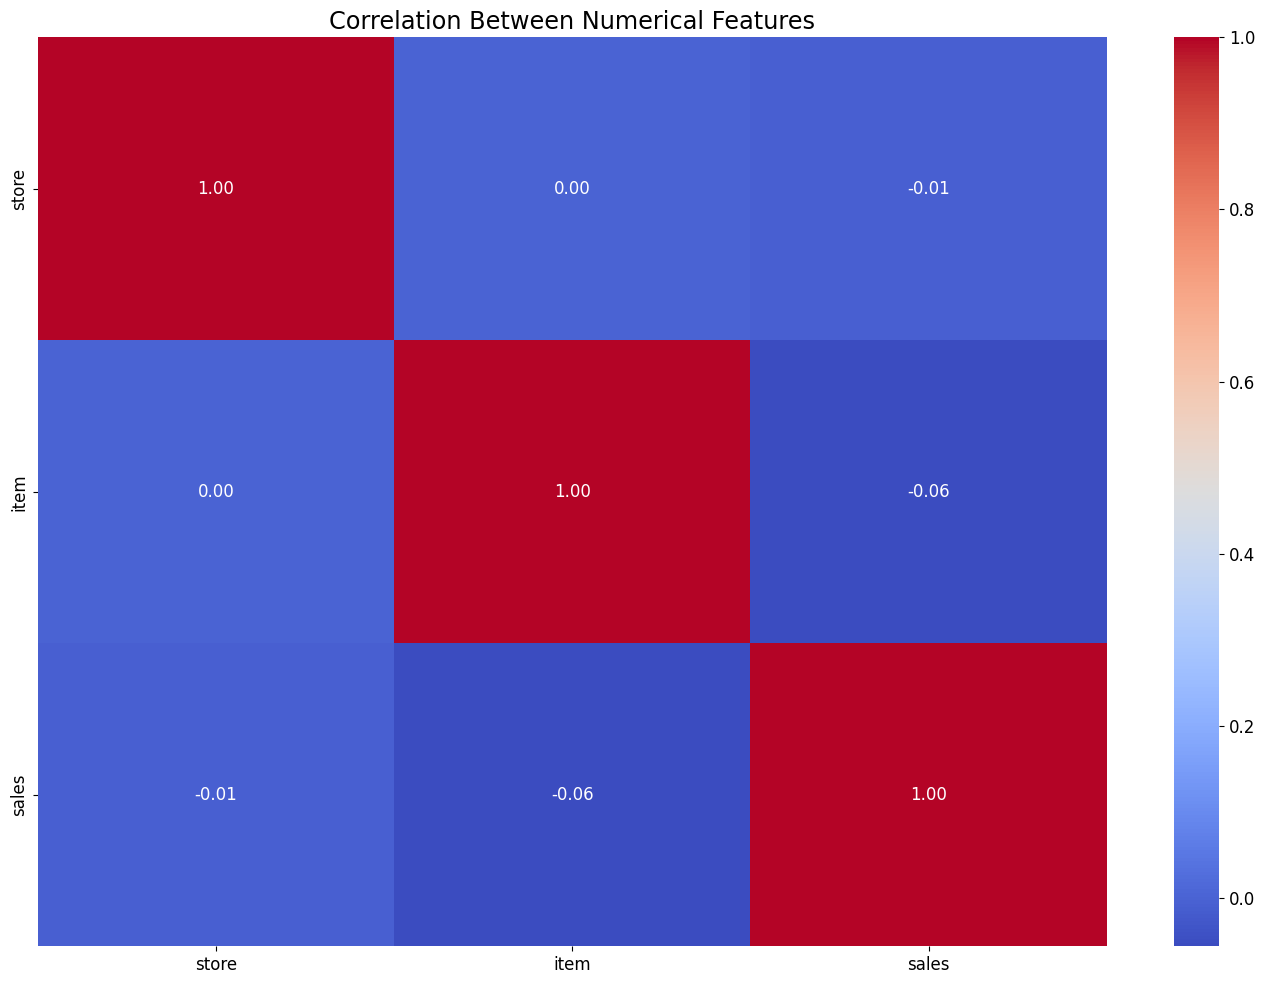


HISTOGRAMS:


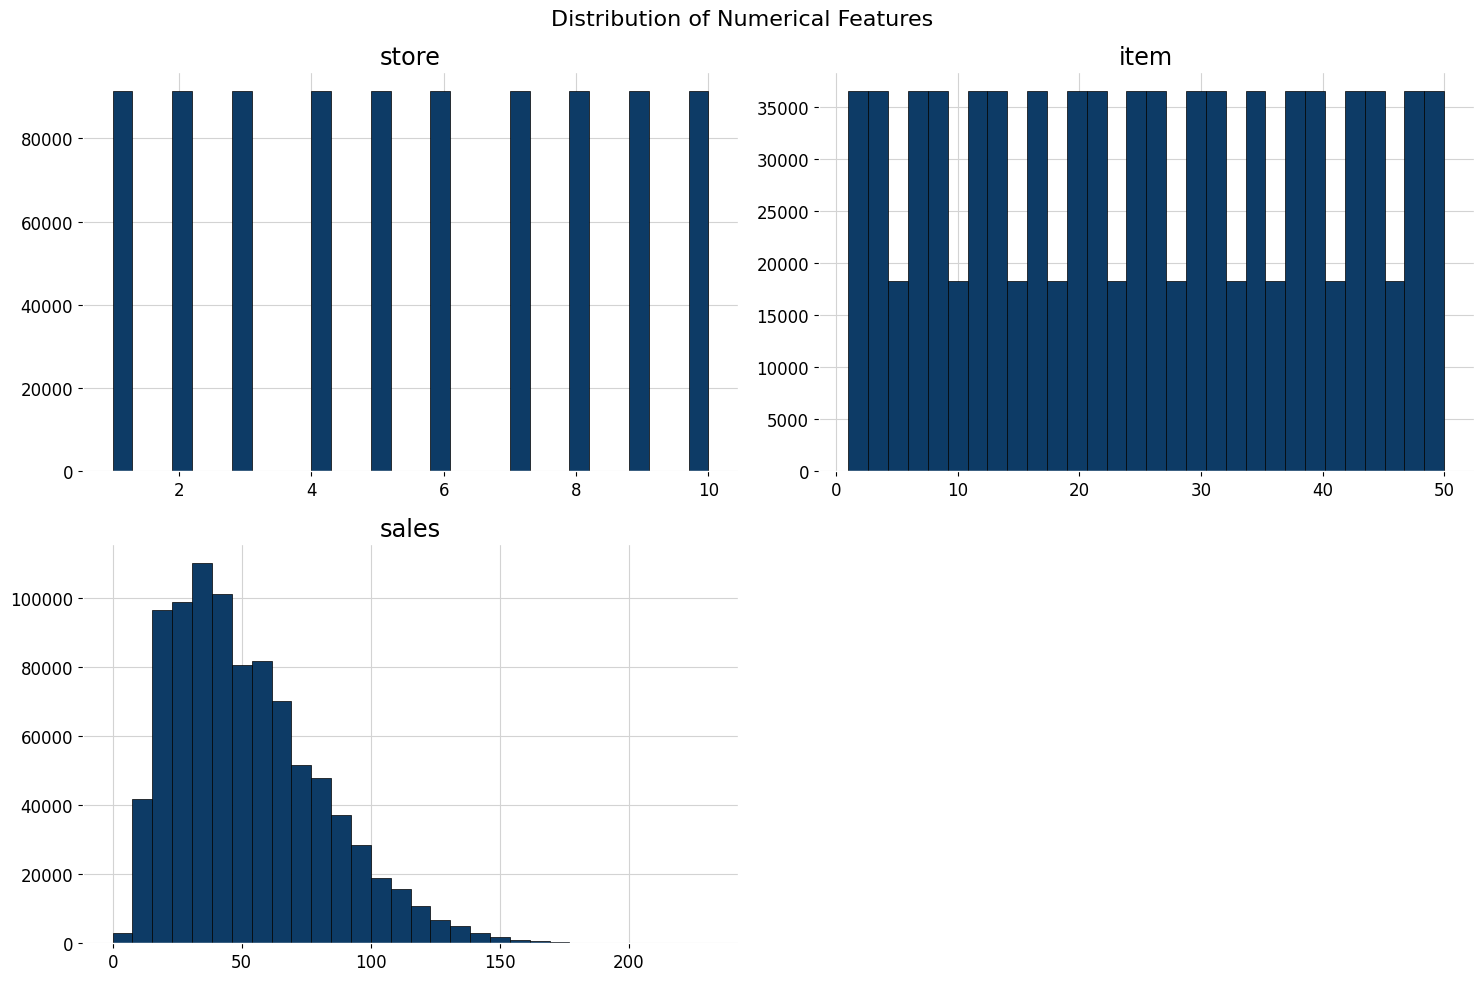


BOXPLOTS FOR OUTLIER CHECK:


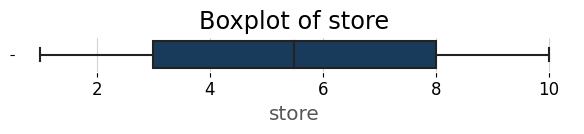

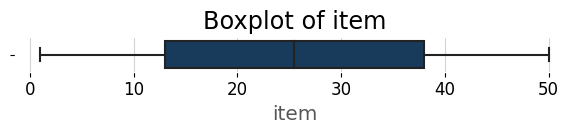

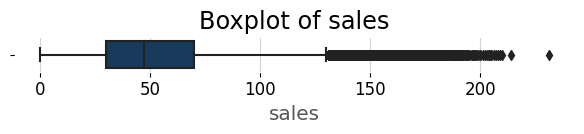

In [5]:
# ---------- Function: Display Basic Info ----------
def basic_info(df):
    print("BASIC INFO")
    print(f"→ Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n→ Column List:", df.columns.tolist())

    print("\nDataFrame Info:")
    buffer = StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())

# ---------- Function: Summary Stats ----------
def summary_statistics(df):
    print("\nSUMMARY STATISTICS:")
    print(df.describe(include='all').T)

# ---------- Function: Missing Values ----------
def missing_value_analysis(df):
    print("\nMISSING VALUE ANALYSIS:")
    missing = df.isnull().sum().to_frame('Missing Count')
    missing['Missing %'] = (missing['Missing Count'] / len(df)) * 100
    print(missing[missing['Missing Count'] > 0])

# ---------- Function: Unique Value Count ----------
def unique_value_analysis(df):
    print("\nUNIQUE VALUES PER COLUMN:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

# ---------- Function: Correlation Heatmap ----------
def correlation_heatmap(df):
    print("\nCORRELATION HEATMAP:")
    plt.figure(figsize=(14, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Between Numerical Features")
    plt.tight_layout()
    plt.show()

# ---------- Function: Histograms ----------
def plot_histograms(df):
    print("\nHISTOGRAMS:")
    df.select_dtypes(include='number').hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.suptitle("Distribution of Numerical Features", fontsize=16)
    plt.tight_layout()
    plt.show()

# ---------- Function: Boxplots ----------
def plot_boxplots(df):
    print("\nBOXPLOTS FOR OUTLIER CHECK:")
    for col in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

# ---------- MAIN RUN ----------
if __name__ == "__main__":

    # Call each analysis step
    basic_info(df)
    summary_statistics(df)
    missing_value_analysis(df)
    unique_value_analysis(df)
    correlation_heatmap(df)
    plot_histograms(df)
    plot_boxplots(df)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


# Analysis and Insights of Dataset

- Store coverage – Data includes 10 stores (IDs 1–10) with a balanced distribution (mean store ID 5.5).
- Product range – 50 unique items (IDs 1–50) are represented, evenly spread across the dataset.
- Sales volume – Average daily sales per item-store pair are about 52 units, ranging from 0 to 231.
- Sales distribution – The interquartile range (30–70 units) indicates moderate variability, with occasional high-sales outliers.
- There are no missing and duplicated values in the data.
- Convert `date` column to the proper datetime format and set it as the dataset index to facilitate data manipulation and visualization. In forecasting tasks, the date column is crucial, as it serves as the basis for creating additional time series features and enables the visualization of sales trends, seasonal patterns, and other temporal characteristics.


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_values(by=['date', 'store', 'item'], inplace=True)
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,1,2,33
2013-01-01,1,3,15
2013-01-01,1,4,10
2013-01-01,1,5,11


In [8]:
print(f'The data goes from {df.index.min()} to {df.index.max()}.')

The data goes from 2013-01-01 00:00:00 to 2017-12-31 00:00:00.


# Creating Time Series Features
- I will begin by creating basic time series features. This initial feature creation aims to extract useful information from the available attributes. Following this, I will explore the data to identify time series trends, seasonal patterns, and other characteristics, with a particular focus on sales behavior.

In [9]:
def create_time_series_features(
    data, target, to_sort=None, to_group=None, lags=None, windows=None, weights=None, 
    min_periods=None, win_type=None, date_related=True, lag=False, 
    log_transformation=False, roll=False, ewm=False, 
    roll_mean=False, roll_std=False, roll_min=False, roll_max=False
):
    """
    Generate additional time-series features for forecasting tasks.

    Args:
        data (pd.DataFrame): Input DataFrame with a datetime index.
        target (str): Target variable name.
        to_sort (str, optional): Column name to sort by before feature creation.
        to_group (str, optional): Column name to group by for lag/rolling operations.
        lags (list[int], optional): Lag periods to create lag features.
        windows (list[int], optional): Window sizes for rolling features.
        weights (list[float], optional): Weights for exponentially weighted mean.
        min_periods (int, optional): Minimum observations for rolling windows.
        win_type (str, optional): Type of rolling window calculation.
        date_related (bool, optional): Whether to extract date-related features.
        lag (bool, optional): Whether to generate lag features.
        log_transformation (bool, optional): Whether to log-transform target.
        roll (bool, optional): Whether to generate rolling window features.
        ewm (bool, optional): Whether to generate exponentially weighted mean features.
        roll_mean, roll_std, roll_min, roll_max (bool): Specific rolling metrics.

    Returns:
        pd.DataFrame: Original DataFrame with added features.
    """
    try:
        df = data.copy()

        # -------------------------
        # 1. Date-related features
        # -------------------------
        if date_related:
            idx = df.index
            df = df.assign(
                dayofweek=idx.dayofweek,
                quarter=idx.quarter,
                month=idx.month,
                year=idx.year,
                dayofyear=idx.dayofyear,
                dayofmonth=idx.day,
                weekofyear=idx.isocalendar().week.astype(float),
                is_wknd=(idx.weekday >= 5).astype(int),
                is_month_start=idx.is_month_start.astype(int),
                is_month_end=idx.is_month_end.astype(int)
            )

        # -------------------------
        # 2. Log transformation
        # -------------------------
        if log_transformation:
            df[target] = np.log1p(df[target])

        # Ensure sorting for lag/rolling
        if any([lag, roll]):
            df.sort_values(by=to_sort, inplace=True)

        # -------------------------
        # 3. Lag features
        # -------------------------
        if lag and lags:
            for l in lags:
                df[f"{target}_lag_{l}"] = (
                    df.groupby(to_group)[target].transform(lambda x: x.shift(l))
                )

        # -------------------------
        # 4. Rolling features
        # -------------------------
        if roll and windows:
            roll_funcs = {
                'mean': roll_mean,
                'std': roll_std,
                'min': roll_min,
                'max': roll_max
            }

            for func_name, active in roll_funcs.items():
                if active:
                    for w in windows:
                        df[f"{target}_roll_{func_name}_{w}"] = (
                            df.groupby(to_group)[target]
                            .transform(lambda x: x.shift(1)
                                       .rolling(window=w, min_periods=min_periods, win_type=win_type)
                                       .agg(func_name))
                        )

        # -------------------------
        # 5. Exponentially Weighted Mean
        # -------------------------
        if ewm and weights and lags:
            for weight in weights:
                for l in lags:
                    df[f"{target}_ewm_w_{weight}_lag_{l}"] = (
                        df.groupby(to_group)[target]
                        .transform(lambda x: x.shift(l).ewm(alpha=weight).mean())
                    )

        return df

    except Exception as e:
        raise CustomException(e, sys)


In [10]:
df = create_time_series_features(data=df, target='sales', date_related=True)
df.head()

,store,item,sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,is_wknd,is_month_start,is_month_end
date,,,,,,,,,,,,,
2013-01-01,1,1,13,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,2,33,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,3,15,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,4,10,1,1,1,2013,1,1,1.0,0,1,0
2013-01-01,1,5,11,1,1,1,2013,1,1,1.0,0,1,0


### Time series train-test-split
- Split the data into training and test sets before EDA to ensure realistic evaluation.
- Reserve the last three months of data as the test set to simulate forecasting unseen future sales.
- Use a chronological split: earlier data for training, later data for testing, to predict future events.
- Avoid random splitting to prevent data leakage.

In [11]:
def time_series_split(data, cutoff_date):
    '''
    Splits the time series data into train and test sets on a chronological order based on the cutoff date.

    Args:
    data (pandas.DataFrame): The time series data to be split.
    cutoff_date (str or datetime): The date that separates the training and test sets.

    Raises:
    CustomException: An error occurred during the time series split.

    Returns:
    tuple: A tuple containing two pandas.DataFrame objects, where the first one represents the training set
    with data before the cutoff date, and the second one represents the test set with data on and after the cutoff date.
    '''
    try:
        train = data.loc[data.index < cutoff_date]
        test = data.loc[data.index >= cutoff_date]
        return train, test
    
    except Exception as e:
        raise CustomException(e, sys)
    

def plot_time_series_split(train, test, cutoff_date):
    '''
    Plots the time series data after splitting into train and test sets.

    Args:
    train (pandas.DataFrame): The training data to be plotted.
    test (pandas.DataFrame): The test data to be plotted.
    cutoff_date (str or datetime): The date that separates the training and test sets.

    Raises:
    CustomException: An error occurred during the plotting process.
    '''
    try:
        figure, ax = plt.subplots(figsize=(20, 7))

        train.plot(ax=ax, label='Train', y='sales')
        test.plot(ax=ax, label='Test', y='sales')

        ax.axvline(cutoff_date, color='black', ls='--')

        plt.title('Time series train-test-split', fontsize=25, fontweight='bold', loc='left', pad=25)
        plt.xlabel('Date', loc='left', labelpad=25)
        plt.ylabel('Sales', loc='top', labelpad=25)
        plt.xticks(rotation=0)
        plt.legend(loc='upper left')
        plt.show()
    
    except Exception as e:
        raise CustomException(e, sys)
    

In [12]:
CUTOFF_DATE = '2017-09-30'
train, test = time_series_split(df, CUTOFF_DATE)
print(f'Train shape: {train.shape}. Train data goes from {train.index.min()} to {train.index.max()}.')
print(f'Test shape: {test.shape}. Train data goes from {test.index.min()} to {test.index.max()}.')

Train shape: (866500, 13). Train data goes from 2013-01-01 00:00:00 to 2017-09-29 00:00:00.
Test shape: (46500, 13). Train data goes from 2017-09-30 00:00:00 to 2017-12-31 00:00:00.


# Visualize the time series train-test-split.

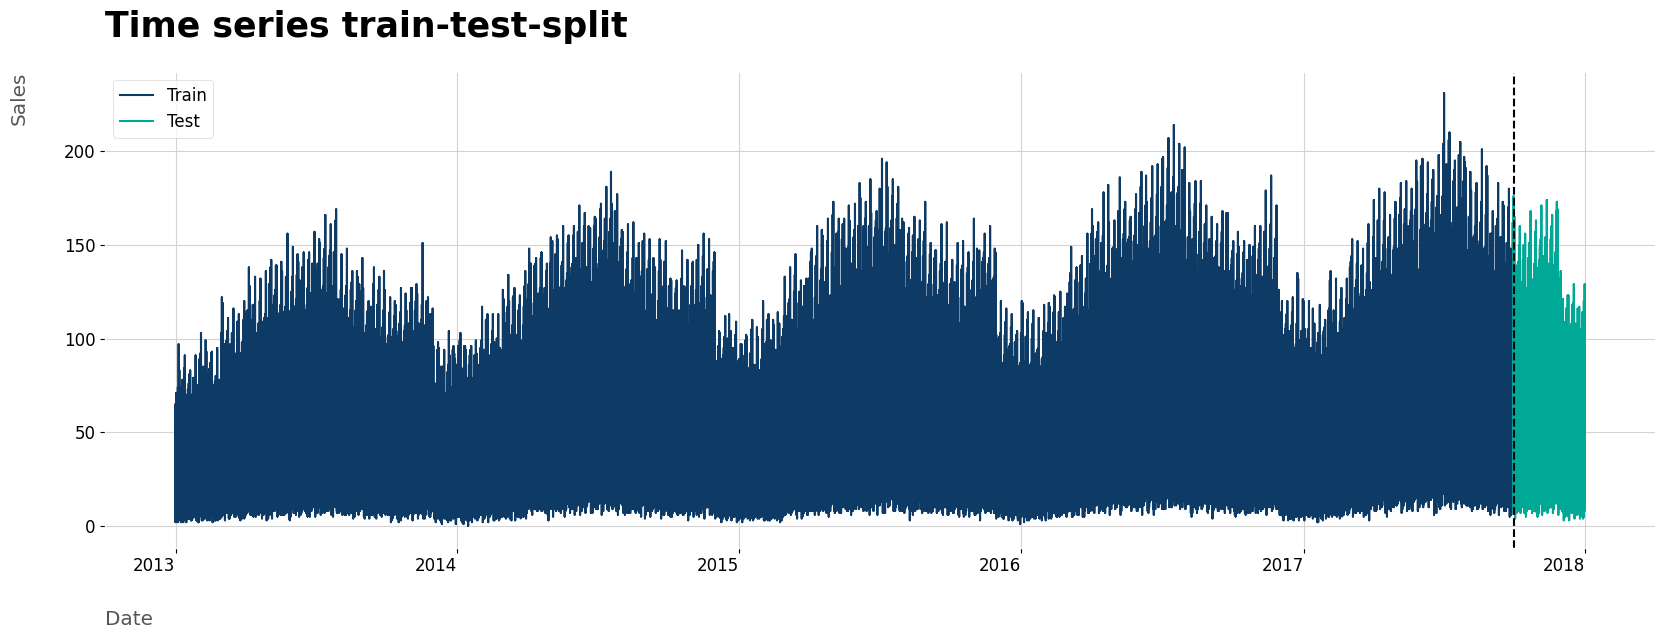

In [13]:
plot_time_series_split(train, test, CUTOFF_DATE)

# Statistical Analysis

In [14]:
print(f"There are {train['store'].nunique()} stores and {train['item'].nunique()} items.")

There are 10 stores and 50 items.


In [16]:
print(f'Number of items in each store: ')
train.groupby(['store'])['item'].nunique()

Number of items in each store: 


store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

# Descriptive statistics for stores sales.

In [17]:
train.groupby(['store']).agg({'sales': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      86650  4084466  47.137519   44.0  24.016892   1  155
2      86650  5792453  66.848852   62.0  33.618041   3  231
3      86650  5144873  59.375338   55.0  29.997813   3  196
4      86650  4744968  54.760162   51.0  27.749964   4  186
5      86650  3437398  39.669913   37.0  20.380008   2  130
6      86650  3433953  39.630156   37.0  20.325261   0  134
7      86650  3142532  36.266959   34.0  18.692075   1  122
8      86650  5542348  63.962470   59.0  32.250470   4  204
9      86650  4757040  54.899481   51.0  27.846524   4  195
10     86650  5074691  58.565389   54.0  29.577744   3  187

# Descriptive statistics for item sales.

In [18]:
train.groupby(['item']).agg({'sales': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     17330   380010  21.927871   21.0   8.493356   1   59
2     17330  1012599  58.430410   56.0  20.192987   9  150
3     17330   633098  36.531910   35.0  13.216580   7  104
4     17330   380462  21.953953   21.0   8.431758   0   66
5     17330   317239  18.305770   18.0   7.283992   1   50
6     17330  1011459  58.364628   56.0  20.281721  11  148
7     17330  1011628  58.374380   56.0  20.226265  11  141
8     17330  1329587  76.721696   74.0  26.209976  15  181
9     17330   888735  51.283035   49.0  17.854111   6  134
10    17330  1265509  73.024178   70.0  24.919198  14  175
11    17330  1203177  69.427409   67.0  23.823559  11  170
12    17330  1203732  69.459435   67.0  23.853727  12  170
13    17330  1457588  84.107790   81.0  28.432361  20  210
14    17330  1013910  58.506059   56.0  20.160745  12  152
15    17330  1521320  87.785343   84.0  29.629535  17  231
16    17330   443668  25.601154   25.0   9.623896   2   70
17    17330   570550  32.922677   32.0  12.019029   4   83
18    17330  1456620  84.051933   81.0  28.538608  18  208
19    17330   697532  40.249971   39.0  14.388879   5   99
20    17330   821210  47.386613   46.0  16.561348   9  127
21    17330   696886  40.212695   39.0  14.385391   7  109
22    17330  1391386  80.287709   77.0  27.236912  14  214
23    17330   506243  29.211945   28.0  10.845216   3   81
24    17330  1141556  65.871668   63.0  22.603871  14  156
25    17330  1394812  80.485401   77.0  27.346004  18  193
26    17330   823589  47.523889   46.0  16.796210   8  119
27    17330   381346  22.004962   21.0   8.498972   1   59
28    17330  1518790  87.639354   84.0  29.607440  16  206
29    17330  1203371  69.438604   67.0  23.713725  15  173
30    17330   697548  40.250894   39.0  14.421651   5  115
31    17330  1013684  58.493018   56.0  20.206133  10  159
32    17330   759910  43.849394   42.0  15.609326   5  119
33    17330  1202717  69.400866   67.0  23.809616  15  169
34    17330   444684  25.659781   25.0   9.638333   2   79
35    17330  1137423  65.633179   63.0  22.559962  12  168
36    17330  1331062  76.806809   74.0  26.157530  16  188
37    17330   505633  29.176746   28.0  10.795455   3   74
38    17330  1391199  80.276919   77.0  27.214937  15  188
39    17330   758314  43.757299   42.0  15.553706   7  112
40    17330   505427  29.164859   28.0  10.858684   3   74
41    17330   380516  21.957069   21.0   8.415531   2   60
42    17330   634286  36.600462   35.0  13.261404   5   96
43    17330   886269  51.140739   49.0  17.853993   9  126
44    17330   508009  29.313849   28.0  10.830966   3   78
45    17330  1393002  80.380958   77.0  27.445913  18  205
46    17330  1013189  58.464455   56.0  20.286005  11  150
47    17330   380371  21.948702   21.0   8.449978   2   61
48    17330   887318  51.201269   49.0  17.949133   8  130
49    17330   507336  29.275014   28.0  10.920223   3   77
50    17330  1139213  65.736469   63.0  22.508507  12  164

**Summary of Distribution:**

- Each store has 86,650 sales records, ensuring consistent data volume across stores.
- Average sales per store range from ~36 (store 7) to ~67 (store 2), with median values slightly lower than the mean in most cases.
- Sales variability differs across stores: standard deviations range from ~18.7 (store 7) to ~33.6 (store 2).
- Sales ranges show minimums from 0–4 and maximums from 122–231, indicating some stores have occasional extreme sales values.
- Store 2 and 8 performing better than others 
- Items 28 and 15 are the most sold ones.

# Descriptive statistics for item<>stores sales.

In [ ]:
train.groupby(['store', 'item']).agg({'sales': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']})

# Time series decomposition
-  Time series data is a sequence of data points indexed in time order, typically at uniform intervals, used to track changes over time and analyze trends, patterns, and seasonal variations.
- A time series is stationary when its statistical characteristics, such as mean, variance and covariance don't change over time.
- Time series decomposition: Analyze time series data by breaking it down into components to understand the underlying patterns, trends and irregularities within the data.
- Trend, seasonal, cyclical and residual components.
- Trend Component: Underlying long-term progression or direction of the time series. Shows wheter the data is increasing, decreasing or remaining relatively constant over time.
- Seasonal Component: Regular, periodic fluctuations or patterns that occurs at specific intervals within the time series (annually, quarterly, monthly, and so on).
- Cyclical Component: Fluctuations in the time series that are not of a fixed period. Typically associated with business/economic cycles.
- Residual Component: Random fluctuations or irregularities that cannot be attributed to the trend, seasonal or cyclical patterns. Unexplained variability in the time series.
- In order to perform time series decomposition, I will use the statsmodels package, applying seasonal decomposition using moving averages.
- Moving Average: A moving average is a method that smooths data by creating averages from subsets of consecutive data points, providing a clearer picture of trends and patterns while reducing noise and short-term fluctuations.
- Approaches used to decompose a time series: Additive Model, Multiplicative Model.
- Additive Model: Time Series = Trend + Seasonal + Cyclical + Residual. The relation between the components is linear, constant variance over time.
- Multiplicative Model: Time Series = Trend * Seasonal * Cyclical * Residual. The relation between the components is non-linear, variance is not constant over time, changing with the level of the series (average value around which the data fluctuates).

In [ ]:
monthly_avg_sales = train['sales'].resample('MS').mean()
ts_decomposition = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')

fig = plt.figure()  
fig = ts_decomposition.plot()  
fig.set_size_inches(8, 6)

**Summary of Time Series Analysis:**

1. The time series is not stationary.
2. There is an increasing trend on sales over time.
3. There is seasonality. The sales are higher around july.
4. The residuals are randomly distributed around zero. This randomness suggests that the model is capturing most of the systematic patterns in the data.

# Sales Distribution

In [ ]:
plt.figure(figsize=(20, 7))
sns.histplot(data=train, x='sales', stat='proportion')
plt.title('Sales distribution', loc='left', pad=35, fontsize=25, fontweight='bold')
plt.xlabel('Sales', loc='left', labelpad=20)
plt.ylabel('Proportion', loc='top', labelpad=20)
plt.show()

**Summary of Sales Trend Analysis:**

Sales variable seems to be right-skewed (most of the sales are concentrated in lower values, while there are some outlier records containing higher sales, turning the distribution asymmetric). In the modelling step, we can apply a log-transformation (+1 considering that there are records with 0 sales) to normalize sales, making it more symmetric and allowing the model to better capture the underlying patterns.

# Sales skewness and kurtosis measurement

In [ ]:
train['sales'].agg(['skew', 'kurtosis'])

**Skewness is close to 1, indicating a significant right-skewness. The same for kurtosis.**

- This is moderately positively skewed — most sales values cluster to the right (lower values), with some high-value sales acting as outliers.
- Slightly leptokurtic — the distribution is a bit more peaked with slightly heavier tails than normal, but the effect is mild.

# Sales over the time

In [ ]:
plt.figure(figsize=(20, 7))
plt.title('Sales over time', loc='left', fontsize=25, fontweight='bold', pad=25)
sns.lineplot(data=train, x='date', y='sales')
plt.xlabel('Date', loc='left', labelpad=25)
plt.ylabel('Sales', loc='top', labelpad=25)
plt.show()

**Summary**

- Sales show a clear upward trend over time, with a noticeable seasonal pattern — peaking around July.

# Sales over the months per year

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='month', y='sales', hue='year')
plt.title('Sales over the months per year', fontsize=25, fontweight='bold', loc='left', pad=25)
plt.xlabel('Month', loc='left', labelpad=25)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Sales', loc='top', labelpad=25)   
plt.legend(loc='upper left')
plt.show()

**Summary**
- The sales are higher in july and increase over the years.

# Sales over the weeks of year

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='weekofyear', y='sales')
plt.title('Sales over the weeks of year', fontsize=25, fontweight='bold', loc='left')
plt.xlabel('Week', loc='left', labelpad=25)
plt.ylabel('Sales', loc='top', labelpad=25)
plt.show()

**Summary**

- Weekly sales exhibit a recurring pattern, with a noticeable peak during the weeks surrounding July.

# Sales over the week

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='dayofweek', y='sales')
plt.title('Sales over the week', fontsize=25, fontweight='bold', loc='left', pad=25)
plt.xlabel('Day', loc='left', labelpad=25)
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Sales', loc='top', labelpad=25)   
plt.show()

**Summary**
- The sales tend to increase throughout the week. Sunday presents the highest sales.

# Sales over the month

In [ ]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x='dayofmonth', y='sales')
plt.title('Sales over the month', fontsize=25, fontweight='bold', loc='left', pad=25)
plt.xlabel('Day', loc='left', labelpad=25)
plt.ylabel('Sales', loc='top', labelpad=25)   
plt.show()

**Summary**
- It is noticeable that there is a peak in sales at the end of the month, especially in the 30th day.

# Sales per store

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=train, x='store', y='sales', color='#233D4D')
plt.title('Sales distribution per store', fontsize=25, fontweight='bold', loc='left')
plt.xlabel('Store', labelpad=25, loc='left')
plt.ylabel('Sales', labelpad=25, loc='top')
plt.show()

**Summary**
- Stores 2 and 8 are the best ones. They tend make more sales. Moreover, stores 5, 6 and 7 are the worst.

# Sales per item

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=train, x='item', y='sales', color='#233D4D')
plt.title('Sales distribution per item', fontsize=25, fontweight='bold', loc='left')
plt.xlabel('Item', labelpad=25, loc='left')
plt.ylabel('Sales', labelpad=25, loc='top')
plt.show()

**Summary**
- Items 28 and 15 tend to be the most sold ones.

# Outlier Analysis
Outliers will be examined to determine if they are measurement errors. If confirmed, they will be removed, as they can negatively affect model performance. Boxplots based on the IQR method will be used for outlier visualization.

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=train, x='sales')
plt.show()

**Summary**
- There are a lot of outliers in sales. However, naturally some stores make more sales at some time periods. Apparently there is an observation pretty further from the others. I will investigate it below.

In [ ]:
train.loc[train['sales'] > 200, ['sales', 'store', 'dayofweek', 'month']]

In [ ]:
train.loc[train['sales'] == train['sales'].max(), ['sales', 'store', 'dayofweek', 'month']]

**Summary**
- The outliers do not indicate inconsistent information. The highest sales occur in Store 2 on a Sunday in July, confirming the patterns identified during the EDA. Therefore, the outliers are valid.

# EDA conclusions
**Main insights:**
1. The sales present an increasing trend over the years. 
2. There is seasonality in items sales. The sales are higher around july.
3. The time series data is not stationary.
4. The sales tend to increase throughout the week. Sunday presents the highest sales volume. The same is true over the month, with the 30th day presenting the higher sales volume.
5. Stores 2 and 8 are the best ones. They tend to make more sales than the others. Stores 5, 6 and 7 are the worst ones.
6. Items 28 and 15 tend to be the most sold ones.

# Time Series Cross-Validation
- Time series data consists of observations indexed in chronological order, typically recorded at uniform intervals.
- Unlike standard cross-validation, random sampling is not appropriate because it would involve using future values to predict past values, which is unrealistic.
- Instead, the data is split based on time using forward chaining (also known as rolling or expanding cross-validation). This process begins with an initial training subset, which is used to forecast subsequent observations. After evaluation, the predicted observations are added to the training set, and the process repeats to forecast further points.
- In this analysis, TimeSeriesSplit from scikit-learn will be used to perform expanding-window cross-validation. This approach evaluates the model’s ability to generalize to future, unseen data and enables comparison between models trained with different data preparation strategies.
- To verify that the time series split is correctly implemented, we will set a test size that corresponds to 3 months of daily sales for 50 items across 10 stores, i.e., 1 × 93 × 50 × 10.
Additionally, a one-week gap will be inserted between the training and validation sets to prevent overfitting. This gap equates to 1 × 7 × 50 × 10.

In [ ]:
def time_series_cv_report(data, target, test_size=None, gap=0, n_splits=5):
    '''
    Generates a time series cross-validation report and plot for the data.

    Args:
    data (pandas.DataFrame): The time series data.
    target (str): The target variable.
    test_size (int, optional): The size of the test set. Defaults to None.
    gap (int, optional): The gap between train and test sets. Defaults to 0.
    n_splits (int, optional): Number of splits for cross-validation. Defaults to 5.

    Raises:
    CustomException: An error occurred during the time series cross-validation report generation.
    '''
    try:
        # Get sklearn TimeSeriesSplit object to obtain train and validation chronological indexes at each fold.
        tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size, gap=gap)

        fig, axes = plt.subplots(n_splits, 1, figsize=(20, 8), sharex=True, sharey=True)

        for fold, (train_index, val_index) in enumerate(tscv.split(data)):
            # Print train and validation indexes at each fold.
            print('-'*30)
            print(f'Fold {fold}')
            print(f'Train: {train_index[0]} to {train_index[-1]}')
            print(f'Validation: {val_index[0]} to {val_index[-1]}')

            # Plot the Time Series Split at each fold.
            axes[fold].plot(data.index, data[target], label='Complete Data', color='green')
            axes[fold].plot(data.iloc[train_index].index, data[target].iloc[train_index], label='Train')
            axes[fold].plot(data.iloc[val_index].index, data[target].iloc[val_index], label='Validation')

            axes[fold].set_title(f'Fold {fold} Time Series Split')
            axes[fold].legend(loc='upper left')

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        raise Exception(e)

In [ ]:
TEST_SIZE, GAP, TARGET = 1*93*50*10, 1*7*50*10, 'sales'
time_series_cv_report(train,  target=TARGET, test_size=TEST_SIZE, gap=GAP, n_splits=5)

# Data Preperation Strategy

- Use iterative CRISP-DM cycles — test and compare multiple data preparation and modelling approaches with clear experiment numbering.
- Apply time series cross-validation to reliably compare approaches and reserve the test set for final model evaluation (simulate production).
- LightGBM chosen for high predictive power, speed, and minimal preprocessing; no feature scaling required.
- Keep ordinal date features as-is to capture seasonality; categorical-like numeric features (store, item) initially left untransformed but will test alternatives.
- No treatment for missing values from lag/rolling features (LightGBM handles them) and outliers confirmed valid during EDA.
- Create a wide set of time series features (date-based, lags, rolling stats, holiday flags, aggregations); apply feature selection; test log transformation for skewed sales.

# Baseline Preperation and Feaure Engineering
- Starting with baseline data preparation and modelling. Then,will try to enhance this baseline model performance.
- Initially, let's create basic date-related time series features. 

In [ ]:
def create_time_series_features(data, target, to_sort=None, to_group=None, lags=None, windows=None, weights=None, min_periods=None, win_type=None, date_related=True, lag=False, log_transformation=False, roll=False, ewm=False, roll_mean=False, roll_std=False, roll_min=False, roll_max=False):
    '''
    Create time-series features from the given data.

    Args:
        data (DataFrame): The input data containing time-series information.
        target (str): The name of the target variable.
        to_sort (str, optional): The column name used for sorting the data. Defaults to None.
        to_group (str, optional): The column name used for grouping data. Defaults to None.
        lags (list of int, optional): List of lag values for creating lag features. Defaults to None.
        windows (list of int, optional): List of window sizes for creating rolling window features. Defaults to None.
        weights (list of float, optional): List of weights for creating exponentially weighted mean features. Defaults to None.
        min_periods (int, optional): The minimum number of observations required to have a value. Defaults to None.
        win_type (str, optional): The window type for rolling window calculations. Defaults to None.
        date_related (bool, optional): Flag indicating whether to create date-related features. Defaults to True.
        lag (bool, optional): Flag indicating whether to create lag features. Defaults to False.
        log_transformation (bool, optional): Flag indicating whether to apply log transformation to the target variable. Defaults to False.
        roll (bool, optional): Flag indicating whether to create rolling window features. Defaults to False.
        ewm (bool, optional): Flag indicating whether to create exponentially weighted mean features. Defaults to False.
        roll_mean (bool, optional): Flag indicating whether to create rolling mean features. Defaults to False.
        roll_std (bool, optional): Flag indicating whether to create rolling standard deviation features. Defaults to False.
        roll_min (bool, optional): Flag indicating whether to create rolling minimum features. Defaults to False.
        roll_max (bool, optional): Flag indicating whether to create rolling maximum features. Defaults to False.

    Returns:
        DataFrame: DataFrame containing the original data with additional time-series features.

    Raises:
        CustomException: If an exception occurs during feature creation.
    '''
    try:
        df = data.copy()

        # Create date-related features.
        if date_related:
            df['dayofweek'] = df.index.dayofweek
            df['quarter'] = df.index.quarter
            df['month'] = df.index.month
            df['year'] = df.index.year
            df['dayofyear'] = df.index.dayofyear
            df['dayofmonth'] = df.index.day
            df['weekofyear'] = df.index.isocalendar().week.astype(np.float64)
            df['is_wknd'] = df.index.weekday // 4
            df['is_month_start'] = df.index.is_month_start.astype(int)
            df['is_month_end'] = df.index.is_month_end.astype(int)

        # Apply log_transformation to the target variable.
        if log_transformation:
            df[target] = np.log1p(df[target])
        
        # Create lag features.
        if lag:
            df.sort_values(by=to_sort, axis=0, inplace=True)
            for lag in lags:
                df['sales_lag_' + str(lag)] = df.groupby(to_group)[target].transform(lambda x: x.shift(lag))
        
        # Create rolling window features.
        if roll:
            df.sort_values(by=to_sort, axis=0, inplace=True)

            if roll_mean:
                for window in windows:
                    df['sales_roll_mean_' + str(window)] = df.groupby(to_group)[target].transform(lambda x: x.shift(1).rolling(window=window, min_periods=min_periods, win_type=win_type).mean())
            if roll_std:
                for window in windows:
                    df['sales_roll_std_' + str(window)] = df.groupby(to_group)[target].transform(lambda x: x.shift(1).rolling(window=window, min_periods=min_periods, win_type=win_type).std())
            if roll_min:
                for window in windows:
                    df['sales_roll_min_' + str(window)] = df.groupby(to_group)[target].transform(lambda x: x.shift(1).rolling(window=window, min_periods=min_periods, win_type=win_type).min())
            if roll_max:
                for window in windows:
                    df['sales_roll_max_' + str(window)] = df.groupby(to_group)[target].transform(lambda x: x.shift(1).rolling(window=window, min_periods=min_periods, win_type=win_type).max())

        # Create exponentially weighted mean features.
        if ewm:
            for weight in weights:
                    for lag in lags:
                        df['sales_ewm_w_' + str(weight) + '_lag_' + str(lag)] = df.groupby(to_group)[target].transform(lambda x: x.shift(lag).ewm(alpha=weight).mean())
            
        return df

    except Exception as e:
        raise CustomException(e)

In [ ]:
df_date = create_time_series_features(df, TARGET, date_related=True)
df_date.head()

# Log Transformation

- Sales data is significantly right-skewed (as identified during EDA).
- Apply a log transformation to make the distribution more symmetric, helping the model capture patterns more effectively.
- Since there are zero sales in the data, add a constant (+1) before applying the log transformation to avoid undefined values.

In [ ]:
df_log = create_time_series_features(df, TARGET, date_related=True, log_transformation=True)
df_log.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))

ax0 = sns.histplot(data=df, x='sales', ax=ax[0], stat='proportion')
ax0.set_title('Sales distribution', fontsize=25, fontweight='bold', loc='left', pad=25)
ax0.set_xlabel('Sales', loc='left', labelpad=25)
ax0.set_ylabel('Proportion', loc='top', labelpad=25)

ax1 = sns.histplot(data=df_log, x='sales', ax=ax[1], stat='proportion')
ax1.set_title('Log-sales distribution', fontsize=25, fontweight='bold', loc='left', pad=25)
ax1.set_xlabel('Sales', loc='left', labelpad=25)
ax1.set_ylabel('Proportion', loc='top', labelpad=25)

plt.tight_layout()
plt.show()

**Summary**

- By applying log transformation to sales variable, its distribution becomes more symmetric, allowing the model to better capture the patterns behind the data.

# Lag Features
- Lag features are past observations of a time series variable used as predictors for future values.
- They help the model capture temporal dependencies and recurring patterns in the data.
- The choice of lag values depends on the correlation between current values and their past values, which can be assessed using ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.
- ACF measures the correlation between the series and its lagged version.
- PACF measures the correlation after removing the effects explained by intermediate lags.
- Based on the data’s weekly seasonality (higher sales on Sundays), monthly seasonality (peak in July), and yearly upward trend, lag features will be created for points 3 months, ~3.5 months, 6 months, 1 year, 1.5 years, and 2 years in the past.
- This aligns with the 3-month forecasting horizon and the identified seasonal/trend patterns.

In [ ]:
TO_SORT = ['store', 'item', 'date']
TO_GROUP = ['store', 'item']
lags = [91, 98, 105, 112, 119, 126, 182, 364, 546, 728]
df_log = create_time_series_features(df, TARGET, to_sort=TO_SORT, to_group=TO_GROUP, 
                                     lags=lags, date_related=True, log_transformation=True, lag=True)
# Turning back to ordered date values, necessary for time series cross validation.
df_log.sort_values(by=['date', 'store', 'item'], inplace=True)
df_log

**Summary**

- Lag features have been created successfully.
- Initial rows contain NaN values due to insufficient historical data (less than 91 days).
- Missing values will not be treated, as LightGBM natively handles them.
- ACF and PACF plots will be analyzed to assess the usefulness of these lag features for the model.

# Rolling window features
- Statistics are calculated over a sliding window of observations (mean, median, standard deviation, minimum, maximum, and others).
- It allows us to incorporate temporal context and historical trends, enhancing the machine learning model's performance.
- Will start with a rolling mean/moving average and test rolling standard deviation, min and max further.
- In order to compute the rolling window features, I will shift the values by 1 because pandas rolling function also incorporates the contribution of the present observation when we do the calculations.
- Will use windows of 365, 546 and 730 days. By doing this, the rolling features, like the moving average, will smooth out short-term fluctuations and highlight longer-term trends or cycles in the data.
- There are also expanding window features that could be added to the data. They are an extension of rolling window, in which the windows cover all the past values. However, since rolling window features are already being added and might help us more, I will not even test expanding window ones.

In [ ]:
windows = [365, 546, 730]
df_roll_mean = create_time_series_features(df, TARGET, TO_SORT, TO_GROUP, 
                                           lags=lags, windows=windows, min_periods=30, win_type=None, 
                                           date_related=True, lag=True, log_transformation=True, roll=True, roll_mean=True)
df_roll_mean.sort_values(by=['date', 'store', 'item'], inplace=True)

# Rolling standard deviation features.

In [ ]:
df_roll_std = create_time_series_features(df, TARGET, TO_SORT, TO_GROUP, 
                                          lags=lags, windows=windows, min_periods=30, win_type=None, 
                                          date_related=True, lag=True, log_transformation=True, 
                                          roll=True, roll_mean=True, roll_std=True)
df_roll_std.sort_values(by=['date', 'store', 'item'], inplace=True)

# Create rolling min and max features.

In [ ]:
df_roll_min_max = create_time_series_features(df, TARGET, TO_SORT, TO_GROUP, 
                                          lags=lags, windows=windows, min_periods=30, win_type=None, 
                                          date_related=True, lag=True, log_transformation=True, 
                                          roll=True, roll_mean=True, roll_std=True, roll_min=True, roll_max=True)
df_roll_std.sort_values(by=['date', 'store', 'item'], inplace=True)

# Exponentially weighted mean features 
- Assign greater importance to more recent observations while giving progressively less weight to older data points.
- The exponentially weighted mean (EWM) is computed by applying exponentially decaying weights to historical values.
- Helps smooth out noise and highlight underlying trends, particularly when recent data is more reflective of current patterns than older records.

In [ ]:
weights = [0.95, 0.9, 0.8, 0.7, 0.5]
df_ewm = create_time_series_features(df, TARGET, TO_SORT, TO_GROUP, 
                                     lags=lags, windows=windows, weights=weights, min_periods=30, 
                                     win_type=None, date_related=True, lag=True, log_transformation=True, 
                                     roll=True, ewm=True, roll_mean=True, roll_std=True, roll_min=True, roll_max=True)
df_ewm.sort_values(by=['date', 'store', 'item'], inplace=True)

# Modelling
- This step involves training the LightGBM model using the prepared dataset. Multiple data preparation and modelling approaches will be tested, and the best-performing configuration will be selected as the final model. To ensure a reliable performance estimate, time series cross-validation (previously detailed in this notebook) will be applied.
- The objective is to measure the impact of each feature engineering step on model performance through cross-validation. Initially, all previously described feature groups will be added, followed by a robust feature selection process to retain only the most important ones for the final model.
- The experiment numbering links each modelling trial to its specific data preparation step. For example, in section 4.2 a log transformation was applied to the sales variable, and in 5.2 LightGBM will be trained on that transformed data. This follows the sequence of CRISP-DM data preparation/modelling cycles.

# Baseline Average Model
Before diving into machine learning techniques, I will assess the performance of an average model. If machine learning achieves a better result, it is suitable for this forecasting task, else our simple average prediction will compensate more.

In [ ]:
def time_series_cv(data, model, target, test_size=None, gap=0, n_splits=5, log=False, verbose=False, display_score=True):
    '''
    Performs time series cross-validation for the specified model and data.

    Args:
    data (pandas.DataFrame): The time series data.
    model : The machine learning model to be used.
    target (str): The target variable.
    test_size (int, optional): The size of the test set. Defaults to None.
    gap (int, optional): The gap between train and test sets. Defaults to 0.
    n_splits (int, optional): Number of splits for cross-validation. Defaults to 5.
    log (bool, optional): Whether a log-transformation was applied to the target variable. Defaults to False.
    verbose (bool, optional): Whether to display verbose output. Defaults to False.
    display_score (bool, optional): Whether to display the cross-validation score. Defaults to True.

    Raises:
    CustomException: An error occurred during the time series cross-validation process.
    '''
    try:
        # Get sklearn TimeSeriesSplit object to obtain train and validation chronological indexes at each fold.
        tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size, gap=gap)

        scores = []
        for fold, (train_index, val_index) in enumerate(tscv.split(data)):
            # Obtain train and validation data at fold k.
            train = data.iloc[train_index]
            val = data.iloc[val_index]

            # Obtain predictor and target train and validation sets.
            X_train = train.drop(columns=[target])
            y_train = train[target].copy()
            X_val = val.drop(columns=[target])
            y_val = val[target].copy()

            # Fit the model to the training data.
            model.fit(X_train, y_train)

            # Predict on validation data.
            y_pred = model.predict(X_val)

            # Obtain the validation score at fold k.
            if log:
                score = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
            else:
                score = np.sqrt(mean_squared_error(y_val, y_pred))
            
            scores.append(score)

            # Print the results and returning scores array.

            if verbose:
                print('-'*40)
                print(f'Fold {fold}')
                print(f'Score (RMSE) = {round(score, 4)}')
        
        if not display_score:
            return scores
        
        print('-'*60)
        print(f"{type(model).__name__}'s time series cross validation results:")
        print(f'Average validation score = {round(np.mean(scores), 4)}')
        print(f'Standard deviation = {round(np.std(scores), 4)}')

        return scores
    
    except Exception as e:
        raise CustomException(e)
    

In [ ]:
train_date, _ = time_series_split(df_date, CUTOFF_DATE)
scores = time_series_cv(train_date, DummyRegressor(strategy='mean'), TARGET, TEST_SIZE, GAP, n_splits=5)

# Baseline LightGBM model
Comparing the average model performance with standard configurated LightGBM performance. If it presents a better result, machine learning is suitable for this forecasting task.

In [ ]:
scores = time_series_cv(train_date, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5)

**Summary**

The baseline LightGBM model performance is a lot better than the average model performance! Thus, machine learning is indeed suitable for the forecasting task and I will keep trying to enhance this baseline LGBMRegressor result.

# Log transformation and lag features LightGBM model
Assess wheter applying a log transformation to sales variable and adding lag features improves the model's performance.

In [ ]:
train_log, _ = time_series_split(df_log, CUTOFF_DATE)
scores = time_series_cv(train_log, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5, log=True)

**Summary**

Applying a log transformation to sales variable and adding lag features improved the model's performance.

# Rolling mean features LightGBM model
Assess wheter adding rolling mean features to the data improves the model's performance.

In [ ]:
train_roll_mean, _ = time_series_split(df_roll_mean, CUTOFF_DATE)
scores = time_series_cv(train_roll_mean, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5, log=True)

**Summary**

Adding rolling mean features (moving averages) improved the model's performance.

# Rolling standard deviation features LightGBM model
Assess wheter adding rolling standard deviation features to the data improves the model's performance.

In [ ]:
train_roll_std, _ = time_series_split(df_roll_std, CUTOFF_DATE)
scores = time_series_cv(train_roll_std, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5, log=True)

**Summary**

Adding standard deviation features didn't present any significant difference in the model's performance. However, I will keep them because they help capturing temporal patterns. Moreover, a feature selection will be performed.

# Rolling min and max features LightGBM model
Assess wheter adding rolling min and max features to the data improves the model's performance.

In [ ]:
train_roll_min_max, _ = time_series_split(df_roll_min_max, CUTOFF_DATE)
scores = time_series_cv(train_roll_min_max, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5, log=True)

**Summary**

Adding min and max rolling features improved a little bit the model's performance.

# Exponentially weighted mean features LightGBM model
Assess wheter adding exponentially weighted mean features to the data improves the model's performance.

In [ ]:
train_ewm, _ = time_series_split(df_ewm, CUTOFF_DATE)
scores = time_series_cv(train_ewm, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5, log=True)

**Summary**

Although adding ewm features didn't significally improved the model's performance, I will stick with this final data preparation configuration. Now, I will apply feature selection and tune the hyperparameters using Bayesian Search along with time series cross validation below.

In [ ]:
# Obtain the final prepared df.
df_prep = df_ewm.copy()
df_prep.head(5)

In [ ]:
print(f'The final data has {df_prep.shape[0]} rows and {df_prep.shape[1]} columns.')

In [ ]:
# Obtain train and test sets, entirely and splitted in X an y.
train_prep, test_prep = time_series_split(df_prep, CUTOFF_DATE)
X_train_prep = train_prep.drop(columns=['sales'])
y_train = train_prep['sales']
X_test_prep = test_prep.drop(columns=['sales'])
y_test = test_prep['sales']
print(f'Train and target predictor and target sets shapes: {X_train_prep.shape, y_train.shape, X_test_prep.shape, y_test.shape}')

# Feature Selection 

- Feature selection is essential for improving the model’s generalization, simplifying its complexity, and reducing computational costs. With around one million rows and 85 features, streamlining the feature set without sacrificing performance is highly advantageous.
- The Recursive Feature Elimination (RFE) method will be used for feature selection.
- RFE works by iteratively training the model on subsets of features, ranking them by importance, and removing the least important ones until the desired number of features remains.
- The final number of features is a critical hyperparameter for RFE. To determine it automatically, scikit-learn’s RFECV will be applied with a rolling-window time series cross-validation to find the optimal value.

In [ ]:
class RecursiveFeatureEliminator(BaseEstimator, TransformerMixin):
    '''
    A transformer class for selecting features based on the Recursive Feature Elimination (RFE) technique.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by recursively selecting the features with highest feature 
        importances until a final desired number of features is obtained through time series rolling window
        cross validation.
    '''

    def __init__(self, 
                 estimator=LGBMRegressor(verbosity=-1), 
                 scoring='neg_mean_squared_error', 
                 n_folds=3,
                 test_size=1*93*50*10, 
                 gap=1*7*50*10):
        '''
        Initialize the Recursive Feature Elimination (RFE) transformer.
        
        Args:
            estimator (object, default=LGBMRegressor): The model to obtain feature importances.
            scoring (object, default='neg_mean_squared_error'): The scoring for time series rolling window cross-validation.
            n_folds (int, default=5): The number of folds for time series rolling window cross validation.
            test_size (int, default=1*93*50*10): The size of the test for time series rolling window cross validation.
            gap (int, default=1*7*50*10): The gap between training and test for time series rolling window cross validation.
            
        '''
        # Get sklearn TimeSeriesSplit object to obtain train and validation chronological indexes at each fold.
        tscv = TimeSeriesSplit(n_splits=n_folds, 
                               test_size=test_size, 
                               gap=gap)
        
        self.rfe = RFECV(estimator=estimator, 
                         cv=tscv,
                         scoring=scoring)

    def fit(self, X, y):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like): Target labels.

        Returns:
            self: Returns an instance of self.
        '''
        # Save the date indexes.
        date_idx = X.index
        
        self.rfe.fit(X, y)
        
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by recursively selecting the features with highest feature 
        importances.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after recursively selecting the features with highest feature 
            importances.
        '''
        # Recursively select the features with highest feature importances.
        X_selected = self.rfe.transform(X)

        # Create a dataframe for the final selected features.
        selected_df = pd.DataFrame(X_selected,
                                  columns=self.rfe.get_feature_names_out(),
                                  )

        return selected_df


def plot_sales_forecast_items_stores(y_true, y_pred, data):
    '''
    Plots the sales forecast for each item per store.

    Args:
        y_true (array-like): True sales values.
        y_pred (array-like): Predicted sales values.
        Data (DataFrame): DataFrame containing the features over time.

    Returns:
        None
        
    Raises:
        CustomException: An error occurred during the plotting process
    '''
    try:
        actual_pred_data = data.copy()
        actual_pred_data['actual'] = np.expm1(y_true)
        actual_pred_data['pred'] = np.expm1(y_pred)

        fig, axes = plt.subplots(10, 5, figsize=(50, 50))

        # Lists to store legend handles and labels
        legend_handles = []
        legend_labels = []

        for i in range(1, 51):
            item_i_actual_pred = actual_pred_data.loc[actual_pred_data['item'] == i]

            # Determine subplot indices
            row_index = (i - 1) // 5
            col_index = (i - 1) % 5

            # Plot on the appropriate subplot
            ax = axes[row_index, col_index]

            # Iterate over each store and plot predicted sales
            for store in item_i_actual_pred['store'].unique():
                store_data = item_i_actual_pred[item_i_actual_pred['store'] == store]
                line = sns.lineplot(data=store_data, x=store_data.index, y='pred', label=f'Store {store:.0f}', ax=ax)
                if i == 1:  # Only need to collect handles and labels once
                    legend_handles.append(line.lines[0])
                    legend_labels.append(f'Store {store:.0f}')

            # Set labels and title
            ax.set_xlabel('Date', loc='left', labelpad=25)
            ax.set_ylabel('Sales', loc='top', labelpad=25)
            ax.set_title(f'Item {i} sales forecast per store', fontweight='bold', fontsize=25, pad=25)
            ax.grid(True)
            ax.legend().remove()  # Remove legend from each subplot

        # Create a single legend outside the loop
        leg = fig.legend(handles=legend_handles, labels=legend_labels, loc='upper left')
        for i in range(0, 10):
            leg.legendHandles[i].set_color(ts_palette[i])

        # Adjust layout
        plt.tight_layout()

        # Show or save the plot
        plt.show()
    except Exception as e:
        raise CustomException(e, sys)
    

def estimate_financial_results(data, y_true, y_pred, per_store=False, per_store_item=False):
    '''
    Estimate financial results based on predicted and true values.

    Args:
        data (DataFrame): The input data containing date, store, and item information.
        y_true (Series): The true sales values.
        y_pred (Series): The predicted sales values.
        per_store (bool, optional): If True, calculate results per store. Defaults to False.
        per_store_item (bool, optional): If True, calculate results per store and item. Defaults to False.

    Returns:
        DataFrame: Estimated financial results.

    Raises:
        CustomException: If an error occurs during the calculation.

    Note:
        This function estimates financial results based on predicted and true sales values. 
        It calculates various scenarios such as total predicted sales, average predicted sales per day,
        daily Mean Absolute Error (MAE), worst and best average sales scenarios, worst and best total 
        sales scenarios, etc. If no specific result is determined, it just estimates the overall total financial result.
    '''
    try:
        financial_results = data.copy().reset_index()[['date', 'store', 'item']]
        financial_results['sales'] = np.expm1(y_true.reset_index(drop=True))
        financial_results['predictions'] = np.expm1(y_pred) 
        
        if per_store:
            # Placeholder for storing results.
            results_stores = []

            # Iterate over each store.
            for store_id in range(1, 11):
                # Obtain data for store i.
                store_i_data = financial_results.loc[financial_results['store'] == store_id]
                
                # Total predictions for the store.
                store_i_total_predictions = store_i_data['predictions'].sum()
                
                # Average predictions per day for the store.
                store_i_avg_predictions = store_i_total_predictions / 93
                
                # MAE per day.
                daily_pred_sales = store_i_data.groupby(['date'])[['sales', 'predictions']].sum().reset_index()
                daily_mae = mean_absolute_error(daily_pred_sales['sales'], daily_pred_sales['predictions'])
                
                # Worst and best daily scenario for average prediction.
                store_i_worst_scenario_avg = store_i_avg_predictions - daily_mae
                store_i_best_scenario_avg = store_i_avg_predictions + daily_mae
                
                # Worst and best total scenarios.
                store_i_worst_scenario_total = store_i_total_predictions - (daily_mae * 93)
                store_i_best_scenario_total = store_i_total_predictions + (daily_mae * 93)
                
                # Append results to the list.
                results_stores.append({
                    'Store': store_id,
                    'Total predicted sales': store_i_total_predictions,
                    'Average predicted sales (daily)': store_i_avg_predictions,
                    'Daily MAE': daily_mae,
                    'Worst average sales scenario (daily)': store_i_worst_scenario_avg,
                    'Best average sales scenario (daily)': store_i_best_scenario_avg,
                    'Worst total sales scenario': store_i_worst_scenario_total,
                    'Best total sales scenario': store_i_best_scenario_total
                })

            # Create DataFrame from results.
            stores_results = round(pd.DataFrame(results_stores))
            stores_results
            
            return stores_results
        
        elif per_store_item:
            sum_pred_items = financial_results.groupby(['store', 'item'])['predictions'].sum().reset_index()
            avg_pred_items = financial_results.groupby(['store', 'item'])['predictions'].mean().reset_index()
            mae_items = financial_results.groupby(['store', 'item']).apply(lambda x: mean_absolute_error(x['sales'], x['predictions'])).reset_index().rename(columns={0: 'MAE'})
            sum_avg = pd.merge(sum_pred_items, avg_pred_items, how='inner', on=['store', 'item']).rename(columns={'predictions_x': 'Total predicted sales', 'predictions_y': 'Average predicted sales (daily)'})
            items_results = pd.merge(sum_avg, mae_items, how='inner', on=['store', 'item'])
            items_results['Worst average sales scenario (daily)'] = items_results['Average predicted sales (daily)'] - items_results['MAE']
            items_results['Best average sales scenario (daily)'] = items_results['Average predicted sales (daily)'] + items_results['MAE']
            items_results['Worst total sales scenario'] = items_results['Total predicted sales'] - items_results['MAE'] * 93
            items_results['Best total sales scenario'] = items_results['Total predicted sales'] + items_results['MAE'] * 93
            items_results = items_results.rename(columns={'store': 'Store', 'item': 'Item'})
            items_results = round(items_results)
            
            return items_results
        
        
        # Total predicted sales and average predicted sales (daily).
        sum_pred = financial_results['predictions'].sum()
        avg_pred = sum_pred / 93

        # MAE per day.
        daily_pred_sales = financial_results.groupby(['date'])[['sales', 'predictions']].sum().reset_index()
        daily_mae = mean_absolute_error(daily_pred_sales['sales'], daily_pred_sales['predictions'])
            
        # Worst and best daily scenario for average prediction.
        worst_scenario_avg = avg_pred - daily_mae
        best_scenario_avg = avg_pred + daily_mae
            
        # Worst and best total scenarios.
        worst_scenario_total = sum_pred - (daily_mae * 93)
        best_scenario_total = sum_pred + (daily_mae * 93)

        overall_results_df = pd.DataFrame({
            'Overall total predicted sales': [sum_pred],
            'Overall average predicted sales (daily)': [avg_pred],
            'Overall daily MAE': [daily_mae],
            'Overall worst average sales scenario (daily)': [worst_scenario_avg],
            'Overall best average sales scenario (daily)': [best_scenario_avg],
            'Overall worst total sales scenario': [worst_scenario_total],
            'Overall best total sales scenario': [best_scenario_total]
        })

        overall_results_df = round(overall_results_df)
        
        return overall_results_df

    except Exception as e:
        raise CustomException(e)

In [ ]:
# Recursively select the features with highest feature importances until the final desired number of features is obtained.
rfe = RecursiveFeatureEliminator(n_folds=3, 
                                 test_size=TEST_SIZE,
                                 gap=GAP,
                                 scoring='neg_mean_squared_error',
                                 estimator=LGBMRegressor(verbosity=-1),)
rfe.fit(X_train_prep, y_train)
X_train_selected = rfe.transform(X_train_prep)
X_test_selected = rfe.transform(X_test_prep)
X_train_selected.shape, X_test_selected.shape

In [ ]:
# Restablish date indexes.
X_train_selected.index = y_train.index
X_test_selected.index = y_test.index

# Visualize the final selected features.
X_train_selected.head(5)

# Assess which are the remaining columns.
X_train_selected.columns.tolist()

**Summary**

As a result, we went from 85 features to 31, removing 54 least important variables. Moreover, it is possible to observe that date related features, lags, rollings and most of the ewm features were maintained, ilustrating the importance of feature engineering when building a machine learning model.

# Hyperparameter tuning
- I intend to tune LightGBM's hyperparameters using Bayesian Optimization. 
- Bayesian optimization is an efficient and adaptive technique for finding the optimal combination of hyperparameters for a machine learning model. It uses probabilistic models to intelligently explore the hyperparameter space, balancing exploration (global search) and exploitation (local search).
- Applying Grid Search would not be good due to its computational expense, lack of consideration for interaction effects and inefficient exploration of the hyperparameter space.
- In order to turn the hyperparameter tuning faster, I will get a smaller subset of my training data (something around 100,000 rows), considering that it will also contain a lot of observations and enough information for the model.
- As the data has time properties, I cannot sample it randomly. Thus, I will get recent data, like a validation set. By taking this recent data, the model will be able to find the best hyperparameters for a representative sample.
- Once I am tuning the hyperparameters on a 100,000 observations sample of the data, it is not possible to use a three-month period for the test set. Thus, I will define a one-month period with a one-week gap.
- I will create an optuna study to minimize an objective function that returns the average time series cross validation score at each trial. By using time series cross validation, we get a more reliable performance evaluation at each trial, and avoid using the test set, which simulates production data.
- An observation here is that for low latency tasks, like this sales forecasting, in which we will run the model with a low frequency, a higher number of lightgbm estimators could be good, like 5,000. However, due to my computer limitations, I will set it in 1,000, which is already useful. Moreover, defining log for learning_rate will give more weight to lower values of it, which is better for the model stability.

In [ ]:
TEST_SIZE_TUNING = 1*31*50*10
GAP_TUNING = 1*7*50*10
train_selected = pd.concat([X_train_selected, y_train], axis=1)
train_sample = train_selected.iloc[766500:866500]

In [ ]:
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'n_estimators': 1000,
        'verbosity': -1,
        'bagging_freq': 1,
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**10),
        'subsample': trial.suggest_float('subsample', 0.05, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
    }

    model = LGBMRegressor(**params)
    rmse_scores = time_series_cv(train_sample, model=model, target=TARGET, test_size=TEST_SIZE_TUNING, 
                                 gap=GAP_TUNING, log=True, display_score=False)
    avg_rmse = np.mean(rmse_scores)
    
    return avg_rmse 

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

In [ ]:
print(f'Best params found for lightgbm: {study.best_params}')
print(f'Best RMSE = {study.best_value}')

# Evaluation
- In this step, I intend to evaluate the final model's performance. In order to achieve this, I will look at a bunch of metrics, such as RMSE, MSE, MAE, MAPE, R2.
- After evaluating the model's performance, I will interpret its results through SHAP values.
- Finally, I will estimate financial results given by the model.

In [ ]:
best_params = { 'objective': 'regression',
                'metric': 'rmse',
                'n_estimators': 1000,
                'verbosity': -1,
                'bagging_freq': 1,
                'learning_rate': 0.004405248775613469, 
                'num_leaves': 115, 
                'subsample': 0.5308684382722297, 
                'colsample_bytree': 0.8948096134372598, 
                'min_data_in_leaf': 71}
lgb_reg = LGBMRegressor(**best_params)
lgb_reg.fit(X_train_selected, y_train)
y_pred = lgb_reg.predict(X_test_selected)

In [ ]:
plot_predictions(X_test_selected.index, np.expm1(y_test), np.expm1(y_pred))

**Summary**

The LightGBM model is performing well overall. However, it appears to make larger errors when predicting higher sales values, which is expected since sudden spikes in sales can be more difficult for the model to capture.

In [ ]:
actual_pred_df = compare_actual_predicted(np.expm1(y_test), np.expm1(y_pred))
actual_pred_df.sample(n=15, random_state=42)

In [ ]:
df_results = evaluate_regressor(np.expm1(y_test), np.expm1(y_pred), np.expm1(y_train), 'LightGBM')

In [ ]:
df_results

In [ ]:
y_pred_train = lgb_reg.predict(X_train_selected)
print(f'Training RMSE = {round(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train))), 4)}')
val_rmse = time_series_cv(train_selected, LGBMRegressor(verbose=-1), TARGET, TEST_SIZE, GAP, n_splits=5, log=True)

**Summary**

1. <b>MAE</b> Our model's predictions, on average, are off by 6.1 units of the target variable (sales).
2. <b>RMSE</b> tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are around 7.97 units away from the actual value, which indicates a good generalization error and model performance, considering an average number sales of 52 products. RMSE is more conservative than MAE.
3. <b>R-squared (R2)</b> is a statistical metric used to measure the proportion of variance in the dependent variable explained by the independent variable(s). It ranges from 0 to 1, where 0 indicates the model does not explain any variance, and 1 indicates a perfect fit. R2 is commonly used to assess the goodness of fit of a regression model. According to the R-squared, 92.2% of the variance in the dependent variable is explained by the model. Very good!
4. <b>MAPE</b> A MAPE of 13.28% mean that, on average, our predictions are either 13.28% higher or 13.28% lower than the actual values.
5. The <b>residuals</b> seem to be normally distributed with mean zero and their variance is almost constant. These are some of the linear regression assumptions which helps us assess wheter our model is doing well.

# Interpret the model's results
- To interpret the results of LightGBM, I will analyze the SHAP values.
- SHAP is a library that allows the interpretation of machine learning algorithm results.
- With it, we can understand the impact of each feature on an individual model prediction. f(x) = E(f(x)) + SHAP
- Basically, the SHAP value of a feature (how much it impacts an individual prediction) is the weighted sum of the marginal contributions considering all possible feature coalitions.
- A feature coalition is a group of features, and its value is the model's individual prediction using only those features.
- The marginal contribution of a feature is the difference between the predicted value for a feature coalition with and without it.
- We sum the marginal contributions for all possible coalitions with and without a feature.
- The weights are based on the probability of the feature we are calculating the SHAP value for being in that coalition.
- We can also aggregate the individual contributions, getting a sense of feature importances. Several plots will be explored below.

$$
\phi_i(v) = \sum_{S \subseteq F \setminus \{i\}} \frac{|S|!(|F| - |S| - 1)!}{|F|!} \left[ f(S \cup \{i\}) - f(S) \right]
$$

Where:
- $ \phi_i(v) $ represents the SHAP value of feature $ i $ for prediction $ v $.
- $ F $ represents the set of all features.
- $ S $ represents a subset of features excluding feature $ i $.
- $ f $ is the model's prediction function.

In [ ]:

# Initialize the SHAP explainer with the final model.
explainer = shap.Explainer(lgb_reg)

# Compute shap values.
shap_values = explainer(X_test_selected)

In [ ]:
# Assess the shape.
np.shape(shap_values.values)

In [ ]:
# Assess some true labels.
y_test.head(10)

**Summary**

- We have 31 variables. For each one, we have a corresponding SHAP value for each observation.
- In the following plots, E(f(X)) represents the average predicted sales, and f(x) represents the predicted sale for that observation. Positive SHAP values increase the sales, while negative values decrease it.
- Through the waterfall plot, we will visualize the contribution of each feature to the prediction of an individual sale.

In [ ]:
shap.plots.waterfall(shap_values[10])

In [ ]:
shap.plots.bar(shap_values)

**Summary**

- The two-year, one year and a half, and one year sales rolling-means are the most important features. Other features such as month, dayofweek and the ewm lag with alpha=0.5 are also very important. This makes total sense, as we saw the presence of trend and seasonality in the time series during the eda.

In [ ]:
shap.plots.beeswarm(shap_values)

**Summary**

As we can see, higher values of two-year, one year and a half, and one year sales rolling means tend to increase the model's prediction. The same is true for the exponentially weighted moving average of one year lags with 0.5 alpha. Moreover, the higher the day of week (like sunday), the higher the impact in the predicted sale. Everything makes sense, as we saw an increasing trend in sales over the years, and over a week, with sunday being the day with highest sales volume.

# Feature importances
- To complement the interpretation made with SHAP values above, I will look at LightGBM feature importances.
- LightGBM calculates feature importances by using the "split" value, which represents the number of times a feature is used to split data across all trees, weighted by the number of samples in each split.

In [ ]:
plot_importance(lgb_reg, max_num_features=31, importance_type='split', xlabel='Split importance', ylabel='Features');

**Summary**

- Month, dayofweek, item and dayofyear are some of the most determinant features. This makes sense, since we have seasonality, with sales being higher in july and on sundays and items that are sold more or less.
- Two year, one year and a half and one year rolling mean features and exponentially weighted mean features presented a high predictive power! This ilustrates the importance of time series feature engineering when building a machine learning model for forecasting.
- Some rolling standard deviation variables were also significantly important, like sales_roll_std_365

# Financial results
- The mean absolute error (MAE) tells us that our model's predictions, on average, are off by approximately 6.1 units of the target variable (sales). This is excellent, considering that the sales range from 0 to 231, with an average value of 52.25.
- Below I present the 3-month forecasted sales per store, per item and total sales, with the errors, worst scenarios (predicted value - mean absolute error) and best scenarios (predicted value + mean absolute error).

In [ ]:
stores_results = estimate_financial_results(X_test_selected, 
                                            y_test,
                                            y_pred,
                                            per_store=True)
stores_results

**Summary**

Interpretation: Store 2 is expected to sell 326,805 items over the next 3 months, averaging about 3,514 items per day. With some possible errors, this number might change by around 70 items. So, on bad days, it might sell 3,444 items, and on good days, it might sell 3,583 items. In total, over the 3 months, it could sell between 320,337 and 333,273 items, depending on how sales go.

In [ ]:
stores_results.sort_values(by=['Total predicted sales', 'Average predicted sales (daily)'], ascending=False).head(3).reset_index(drop=True)

In [ ]:
stores_results.sort_values(by=['Total predicted sales', 'Average predicted sales (daily)'], ascending=True).head(3).reset_index(drop=True)

**Summary**

Stores 2, 3 and 8 will sell more items in the 3-month period while stores 7, 6 and 5 will sell less items.

In [ ]:
items_results = estimate_financial_results(X_test_selected, 
                                           y_test, 
                                           y_pred, 
                                           per_store_item=True)
items_results

**Summary**

Interpretation: Store 1 will sell 5,205 units of item 2 in the next 3 months. On average, it will sell 56 units of this item per day. Considering the error, these values can vary by 6 units. Thus, the best and worst scenarios for the total and average sales are 5,799, 4,612 and 62, 50.

In [ ]:
items_results.sort_values(by=['Total predicted sales', 'Average predicted sales (daily)'], ascending=False).head(3).reset_index(drop=True)

In [ ]:
items_results.sort_values(by=['Total predicted sales', 'Average predicted sales (daily)'], ascending=True).head(3).reset_index(drop=True)

**Summary**

The items 15 and 28 will be the most sold ones in the best stores, 2 and 8, while the item 5 will be the less sold one, in stores 5, 6 and 7. Particularly, the items 15 and 28 will be sold by almost 10 times more than item 5.

In [ ]:
total_results = estimate_financial_results(X_test_selected, 
                                           y_test, 
                                           y_pred)
total_results

# Conclusions
- In this project, I forecasted 3 months of sales for 50 items across 10 different stores of a company using LightGBM. Although it is a time series task, I resolved it using machine learning because this approach also shows very good results.
- The time dependency of the data was respected, doing a chronological train-test-split and an expanding window time series cross validation (to avoid using test set during modelling, simulating real production environment), separating 3 months for test and validation sets in order to simulate the reality of our problem.
- A quick analysis of the time series was made, breaking it into trend, seasonal, cyclical and residual components to assess information for the feature engineering. Then, a massive feature engineering was made, creating date-related features, lag features, rolling window features (mean, std, min and max), exponentially weighted mean features and a logarithmic transformation of the target. All of these data preparation approaches were tested using time series cross validation in order to assess wheter the feature addition was improving the model's performance.
- Then, I performed feature selection with the Recursive Feature Elimination (RFE) technique, which recursively selects the most important subset of features based on feature importances until the final desired number of variables is reached. As a result, we went from 85 features to 31 features, the most important ones.
- After the feature selection, a bayesian optimization was applied using optuna. I did this just to refine a little bit my model, since the predictive power is contained on the features.
- The final lightgbm model showed great results. With a mean absolute error (MAE) of 6.1, our predictions, on average, are off by 6.1 units of the actual sales. This is excellent, considering an average sales of 52 and a range from 0 to 231. Moreover, the training, test and validation scores are similar, demonstrating that the model generalizes well for new unseen data points.
- The results were interpreted through SHAP values and LightGBM feature importances and they make total sense. Month, dayofweek, item and dayofyear are some of the most determinant features, due to seasonality, with sales being higher in july and on sundays and some items that are sold more or less. Moreover, two year, one year and a half and one year rolling mean features and exponentially weighted mean features presented a high predictive power! This ilustrates the importance of time series feature engineering when building a machine learning model for forecasting.
- Then, I estimated financial results assessing the model's forecasting and the error to determine worst and best scenarios. I did this per store, per store and item, and for the total. The company will sell a total of 2,559,998 items in the next 3 months. Particularly, stores 2, 3 and 8 will sell more products, while 5, 6 and 7 will sell less products in this period. Finally, items 15 and 28 will be the most sold ones while item 5 will be the less sold one. The historical patterns found on eda will be preserved.

## CNN-LSTM Model Implementation

In [ ]:
"""
CNN–LSTM DEMAND FORECASTING (Store-Item schema)

This script builds a global CNN-LSTM model using strictly causal windows, evaluates
it with blocked/rolling backtests, and compares against a Seasonal Naive baseline.

You can integrate this alongside your LGBM pipeline. Key entry points:
- build_dataset(...)
- build_model(...)
- backtest_model(...)

Dependencies: pandas, numpy, scikit-learn, tensorflow>=2.9
"""


# -------------------------
# Metrics
# -------------------------

def smape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred))
    denom = np.where(denom == 0, 1.0, denom)
    return float(np.mean(200.0 * np.abs(y_pred - y_true) / denom))


def mase(y_true: np.ndarray, y_pred: np.ndarray, insample: np.ndarray, season: int = 7) -> float:
    """MASE with seasonal naive scaling computed on insample window.
    insample: a 1D array from the *training* portion used to compute the scaling denominator.
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    insample = np.asarray(insample, dtype=float)
    if len(insample) <= season:
        return float(np.nan)
    diff = np.abs(insample[season:] - insample[:-season])
    denom = np.mean(diff) if np.any(np.isfinite(diff)) else np.nan
    if denom == 0 or not np.isfinite(denom):
        return float(np.nan)
    return float(np.mean(np.abs(y_true - y_pred)) / denom)


# -------------------------
# Baselines
# -------------------------

def seasonal_naive(series: np.ndarray, horizon: int, season: int = 7) -> np.ndarray:
    """Forecast by repeating last seasonal pattern."""
    if len(series) < season:
        return np.repeat(series[-1], horizon)
    last_season = series[-season:]
    reps = int(np.ceil(horizon / season))
    return np.tile(last_season, reps)[:horizon]


# -------------------------
# Data preparation
# -------------------------
@dataclass
class WindowSpec:
    lookback: int = 90
    horizon: int = 28
    stride: int = 1  # slide by 1 day
    season: int = 7


def enforce_schema(df: pd.DataFrame) -> pd.DataFrame:
    expected = {"date", "store", "item", "sales"}
    missing = expected - set(df.columns)
    if missing:
        raise ValueError(f"Input DataFrame missing columns: {missing}")
    out = df.copy()
    out['date'] = pd.to_datetime(out['date'])
    out = out.sort_values(['store', 'item', 'date'])
    return out


def add_calendar_features(dates: pd.Series) -> pd.DataFrame:
    """Minimal calendar features; strictly based on current timestamp."""
    df = pd.DataFrame({
        'dow': dates.dt.dayofweek.astype(np.int16),
        'dom': dates.dt.day.astype(np.int16),
        'week': dates.dt.isocalendar().week.astype(np.int16),
        'month': dates.dt.month.astype(np.int16),
    })
    return df


def build_windows_for_series(sales: np.ndarray, cal_feats: np.ndarray, ws: WindowSpec) -> Tuple[np.ndarray, np.ndarray]:
    """Build input windows (X) and targets (y) for a single series.
    X shape: [num_windows, lookback, n_features]
    y shape: [num_windows, horizon]
    Features include: sales history (1) + calendar features per time step.
    """
    T = len(sales)
    L, H, S = ws.lookback, ws.horizon, ws.stride
    n_cal = cal_feats.shape[1]

    X_list, y_list = [], []
    for start in range(0, T - L - H + 1, S):
        end = start + L
        y_end = end + H
        hist = sales[start:end]
        fut = sales[end:y_end]
        hist_cal = cal_feats[start:end, :]
        # feature tensor: concatenate sales and calendar along feature dim
        x = np.concatenate([hist.reshape(-1, 1), hist_cal], axis=1)
        X_list.append(x)
        y_list.append(fut)
    if not X_list:
        return np.empty((0, L, 1 + n_cal)), np.empty((0, H))
    X = np.stack(X_list, axis=0)
    y = np.stack(y_list, axis=0)
    return X, y


def build_dataset(df: pd.DataFrame, ws: WindowSpec, scale_sales: bool = True) -> Tuple[np.ndarray, np.ndarray, Dict[Tuple[int,int], Dict[str, np.ndarray]]]:
    """Build a global dataset of windows across all (store,item) series.
    Returns X, y, and a dictionary with per-series info for inverse transforms.
    """
    df = enforce_schema(df)
    # calendar features per timestamp per series
    cal = add_calendar_features(df['date'])
    cal_cols = cal.columns.tolist()

    # Optional global scaler on sales
    if scale_sales:
        scaler = StandardScaler()
        df['sales_scaled'] = scaler.fit_transform(df[['sales']]).astype(np.float32)
        sales_col = 'sales_scaled'
    else:
        scaler = None
        df['sales_scaled'] = df['sales'].astype(np.float32)
        sales_col = 'sales_scaled'

    X_all, y_all = [], []
    series_meta: Dict[Tuple[int,int], Dict[str, np.ndarray]] = {}

    for (store, item), g in df.groupby(['store', 'item'], sort=False):
        g = g.sort_values('date').reset_index(drop=True)
        sales = g[sales_col].values.astype(np.float32)
        cal_feats = cal.loc[g.index, :].values.astype(np.float32)
        X, y = build_windows_for_series(sales, cal_feats, ws)
        if X.shape[0] == 0:
            continue
        X_all.append(X)
        y_all.append(y)
        series_meta[(store, item)] = {
            'dates': g['date'].values,
            'sales_raw': g['sales'].values.astype(np.float32),
            'sales_scaled': sales,
        }

    if not X_all:
        raise ValueError("No windows generated. Check lookback/horizon vs. series length.")

    X_all = np.concatenate(X_all, axis=0)
    y_all = np.concatenate(y_all, axis=0)

    meta = {
        'scaler': scaler,
        'cal_cols': cal_cols,
        'window_spec': ws,
    }
    series_meta['__global__'] = meta  # store global objects
    return X_all, y_all, series_meta


# -------------------------
# Model
# -------------------------

def build_model(input_steps: int, n_features: int, horizon: int, conv_filters: int = 32, kernel_size: int = 3, lstm_units: int = 128, dropout: float = 0.2) -> tf.keras.Model:
    """CNN-LSTM: 1D Conv -> Pool -> LSTM -> Dense(horizon)."""
    inp = layers.Input(shape=(input_steps, n_features))
    x = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, padding='causal', activation='relu')(inp)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(filters=conv_filters, kernel_size=kernel_size, padding='causal', activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    x = layers.LSTM(lstm_units, return_sequences=False)(x)
    x = layers.Dropout(dropout)(x)
    out = layers.Dense(horizon)(x)

    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mae', metrics=['mse'])
    return model


# -------------------------
# Backtesting / Evaluation
# -------------------------
@dataclass
class BacktestSpec:
    n_splits: int = 4
    test_horizon: int = 28  # forecast horizon
    gap: int = 0            # optional gap between train and test


def backtest_model(df: pd.DataFrame, ws: WindowSpec, bt: BacktestSpec, model_builder_kwargs: Optional[dict] = None, fit_kwargs: Optional[dict] = None, seed: int = 42) -> pd.DataFrame:
    """Blocked expanding-window backtest across the global window dataset.
    For each split:
      - Build windows from the subset of data up to split_end for training
      - Evaluate on the next `test_horizon` days per series using the latest train windows
    Note: This uses window sampling rather than autoregressive rollout for simplicity and speed.
    """
    rng = np.random.default_rng(seed)
    df = enforce_schema(df)
    dates_all = sorted(df['date'].unique())
    H = bt.test_horizon

    # Determine split points
    split_points = []
    min_end_idx = ws.lookback + H
    start_idx = max(min_end_idx, len(dates_all) // (bt.n_splits + 1))
    for i in range(bt.n_splits):
        end_idx = start_idx + i * H
        if end_idx + H > len(dates_all):
            break
        split_points.append(end_idx)
    results = []

    for split_id, end_idx in enumerate(split_points, start=1):
        train_end_date = dates_all[end_idx - 1]
        test_end_date = dates_all[end_idx + H - 1]

        train_df = df[df['date'] <= train_end_date].copy()
        test_df = df[(df['date'] > train_end_date) & (df['date'] <= test_end_date)].copy()

        # Build datasets
        X_train, y_train, meta_train = build_dataset(train_df, ws, scale_sales=True)
        # For test, we need windows whose target lies entirely in test horizon
        X_test, y_test, _ = build_dataset(pd.concat([train_df, test_df], axis=0), ws, scale_sales=True)

        # Filter X_test to only windows whose prediction window ends in test_df
        # That is, windows whose last target timestamp <= test_end_date and >= first test date
        # Simple heuristic: take the final windows from each (store,item) that align with the split boundary.
        # We'll approximate by selecting the last N windows equal to number of series.
        n_series = df.groupby(['store', 'item']).ngroups
        if X_test.shape[0] >= n_series:
            X_test = X_test[-n_series:]
            y_test = y_test[-n_series:]

        # Build/fit model
        n_features = X_train.shape[-1]
        model = build_model(ws.lookback, n_features, ws.horizon, **(model_builder_kwargs or {}))
        cb = [
            callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
        ]
        fit_args = dict(
            epochs=50,
            batch_size=512,
            validation_split=0.1,
            verbose=0,
            callbacks=cb,
            shuffle=False,
        )
        fit_args.update(fit_kwargs or {})
        history = model.fit(X_train, y_train, **fit_args)

        # Predict
        y_pred = model.predict(X_test, verbose=0)

        # Inverse scaling if needed
        scaler: Optional[StandardScaler] = meta_train['__global__']['scaler']
        if scaler is not None:
            # Targets were scaled using StandardScaler on sales; invert both preds and truths
            # StandardScaler expects shape [n,1]
            y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
            y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
            # For MASE denominator, use insample raw sales from train portion concatenated across series
            insample = []
            for key, v in meta_train.items():
                if key == '__global__':
                    continue
                insample.append(v['sales_raw'])
            insample = np.concatenate(insample)
        else:
            y_pred_inv = y_pred
            y_test_inv = y_test
            insample = train_df['sales'].values

        # Aggregate metrics across the stacked windows (approximation to per-series averaging)
        y_true_flat = y_test_inv.reshape(-1)
        y_pred_flat = y_pred_inv.reshape(-1)

        mae = mean_absolute_error(y_true_flat, y_pred_flat)
        rmse = math.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
        s_mape = smape(y_true_flat, y_pred_flat)
        m_ase = mase(y_true_flat, y_pred_flat, insample=insample, season=ws.season)

        # Baseline
        # Build baseline forecasts by repeating last season from the *scaled* space then invert
        # For simplicity, create baseline using raw sales from train_df per series and average
        base_preds = []
        base_truths = []
        for (store, item), gtrain in train_df.groupby(['store', 'item']):
            gtest = df[(df['store']==store) & (df['item']==item) & (df['date']>train_end_date) & (df['date']<=test_end_date)].sort_values('date')
            if gtest.empty:
                continue
            s = gtrain['sales'].values.astype(float)
            pred = seasonal_naive(s, horizon=len(gtest), season=ws.season)
            base_preds.append(pred)
            base_truths.append(gtest['sales'].values.astype(float))
        if base_preds:
            base_preds = np.concatenate(base_preds)
            base_truths = np.concatenate(base_truths)
            base_mae = mean_absolute_error(base_truths, base_preds)
            base_rmse = math.sqrt(mean_squared_error(base_truths, base_preds))
            base_smape = smape(base_truths, base_preds)
        else:
            base_mae = base_rmse = base_smape = float('nan')

        results.append({
            'split': split_id,
            'train_end': pd.to_datetime(train_end_date),
            'test_end': pd.to_datetime(test_end_date),
            'mae': mae,
            'rmse': rmse,
            'smape': s_mape,
            'mase': m_ase,
            'baseline_mae': base_mae,
            'baseline_rmse': base_rmse,
            'baseline_smape': base_smape,
            'epochs_trained': len(history.history.get('loss', [])),
        })

    return pd.DataFrame(results)


# -------------------------
# Sanity checks & training utility
# -------------------------

def quick_overfit_check(X: np.ndarray, y: np.ndarray, max_epochs: int = 50) -> float:
    """Sanity check: can the model overfit a tiny subset? Returns final loss."""
    n = min(2048, X.shape[0])
    X_small, y_small = X[:n], y[:n]
    model = build_model(X.shape[1], X.shape[2], y.shape[1])
    h = model.fit(X_small, y_small, epochs=max_epochs, batch_size=256, verbose=0, shuffle=False)
    final_loss = float(h.history['loss'][-1])
    return final_loss


# -------------------------
# Example usage (adjust paths as needed)
# -------------------------
if __name__ == "__main__":
    # Example assumes a train.csv with columns ['date','store','item','sales']
    # DATA_PATH = os.environ.get('TRAIN', 'train')
    df = train.reset_index()

    ws = WindowSpec(lookback=90, horizon=28, stride=1, season=7)

    # Build full dataset once (optional if you use backtest_model which rebuilds per split)
    X, y, meta = build_dataset(df, ws, scale_sales=True)
    print(f"Windows: X={X.shape}, y={y.shape}")

    # Sanity: quick overfit (loss should drop well below naive MAE on this tiny subset)
    loss = quick_overfit_check(X, y, max_epochs=20)
    print(f"Quick overfit check - final training loss on tiny subset: {loss:.4f}")

    # Backtest against Seasonal Naive
    bt = BacktestSpec(n_splits=4, test_horizon=28)
    results = backtest_model(df, ws, bt, model_builder_kwargs=dict(conv_filters=64, lstm_units=128, kernel_size=5), fit_kwargs=dict(epochs=30, batch_size=512))
    print(results)

    # Save results
